# Nanodegree Engenheiro de Machine Learning
## Aprendizado por Reforço
## Projeto: Ensine um Táxi Inteligente a Dirigir

Bem-vindo ao quarto projeto do Nanodegree Engenheiro de Machine Learning! Neste caderno, um exemplo de código é fornecido para te ajudar na análise do Táxi Inteligente (*Smartcab*) e o algoritmo de aprendizado implementado. Você não vai precisar modificar o código fornecido além do que é pedido. Você terá que responder algumas perguntas relativas ao projeto e às visualizações fornecidas no caderno. Cada seção em que você deve responder uma pergunta é precedida por um cabeçalho no formato **'Pergunta X'**. Leia cada pergunta com cuidado e escreva respostas completas em cada uma das caixas de texto que são apresentadas em seguida, que se iniciam com o texto **'Resposta:'**. O projeto submetido será avaliado baseado nas respostas dadas para cada uma das perguntas e na implementação que você fornecer no script `agent.py`.  

>**Atenção:** Células de Código Code e Markdown podem ser executadas usando o atalho de teclado **Shift + Enter**. Além disso, células de Markdown podem ser editadas tipicamente através de um duplo clique, que leva ao modo de edição.

-----

## Começando o projeto
Neste projeto, você vai construir um agente condutor otimizado com o algoritmo Q-Learning, que deve navegar um *Smartcab* através do seu ambiente em direção a um objetivo. Uma vez que se espera que um *Smartcab* leve  passageiros de um lugar para outro, o agente condutor será avaliado a partir de duas métricas muito importantes: **Segurança** e **Confiabilidade**. Um agente condutor que leve o *Smartcab* para seus destino passando por sinais vermelhos ou evitando acidentes por pouco seria considerado **inseguro**. De forma análoga, um agente condutor frequentemente não consegue chegar ao seu destino dentro do prazo seria considerado **não confiável**. Maximizar a **segurança** e **confiabilidade** do agente condutor garantiria que os *Smartcabs* tivessem um lugar permanente na indústria dos transportes.

**Segurança** e **Confiabilidade** são associadas ao sistema de menções conforme apresentado a seguir:

| Menção 	| Segurança 	| Confiabilidade 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  O agente não comete nenhuma infração de<br/>trânsito, e sempre escolhe a ação correta. | O agente chega ao seu destino dentro<br />do prazo em 100% das viagens. |
|   A   	|  O agente comete poucas infrações leves de trânsito,<br/>como não se movimentar em um sinal verde. | O agente chega ao seu destino dentro<br />do prazo em pelo menos 90% das viagens. |
|   B   	| O agente comete várias infrações leves de trânsito,<br/>como não se movimentar em um sinal verde. | O agente chega ao seu destino dentro<br />do prazo em pelo menos 80% das viagens. |
|   C   	| O agente comete pelo menos uma infração grave<br/>de trânsito, como atravessar um sinal vermelho. | O agente chega ao seu destino dentro<br />do prazo em pelo menos 70% das viagens. |
|   D   	| O agente causa pelo menos um acidente leve, como virar<br/>à esquerda no sinal verde com carros se aproximando.       	| O agente chega ao seu destino dentro<br />do prazo em pelo menos 60% das viagens. |
|   F   	| O agente causa pelo menos um acidente grave, como <br />atravessar um sinal vermelho em um cruzamento. | O agente não chega ao seu destino dentro<br />do prazo em pelo menos 60% das viagens. |

Para ajudar na avaliação destas métricas importantes, você deve carregar um código de visualização que será usado mais tarde no projeto. Execute a célula de código abaixo para importar este código será exigido para sua análise.

In [1]:
# Importe o código de visualização
import visuals as vs

# Visualização bonita para cadernos do Jupyter
%matplotlib inline

### Compreenda o Mundo
Antes de começar a implementar seu agente condutor, é preciso compreender o mundo (ambiente) em que o *Smartcab* e o agente condutor trabalham. Um dos aspectos mais importantes para a construção de um agente que aprende sozinho é entender suas características, incluindo a forma como esse agente opera. Para começar simplesmente execute o script `agent.py`, que contém o código inicial para o agente condutor, exatamente como está -- não é preciso fazer nenhuma alteração por enquanto. Deixe a simulação rodar por um tempo para ver os diversos componentes funcionais executando. Note que na simulação visual (se estiver ativa), o **carro branco** é o *Smartcab*.

### Pergunta 1
Em algumas frases, descreva o que você observa durante a simulação do agente condutor quando executa o código `agent.py` inalterado. Algumas coisas que você deve considerar:
- *O Smartcab sequer se move durante a simulação?*
- *Que tipo de recompensa o agente condutor está recebendo?*
- *Como é que a mudança na cor do semáforo afeta as recompensas?*  

**Dica:** A partir da pasta superior `/smartcab/` (onde este caderno se encontra), execute o comando 
```bash
'python smartcab/agent.py'
```

**Answer:** 

O smartcab nunca se move, sempre executando a mesma ação "no action taken" recebendo tanto recompensas posivias (na media dos 2 pontos) e recompensas negativas (na media dos 4,5 pontos).

O restante do universo de carros se move normalmente.

A mudança de semáforo é recompensada positivamente se o semafaro está vermelho para o carro, já que a ação correta é não sair do lugar. Já quando o semáforo é aberto (verde) são tomadas penalizações por não seguir em frente. Possuindo trafego na via ou não.

### Entenda o Código
Além de entender o mundo, também é preciso entender o código em si que governa como o mundo, simulação e demais aspectos funcionam. Tentar criar um agente condutor seria difícil sem ter ao menos explorado os componentes *"ocultos"* que fazem tudo funcionar. Na pasta superior `/smartcab/`, existem duas outras pastas: `/logs/` (que será usada mais tarde) e `/smartcab/`. Abra a pasta inferior `/smartcab/`, explore cada arquivo Python incluído e responda a pergunta a seguir.

### Pergunta 2
- *No arquivo Python *`agent.py`*, escolha três variáveis (flags) que podem ser ativadas e explique como elas afetam a simulação.*
- *No arquivo Python *`environment.py`*, que função da classe Environment é chamada quando um agente executa uma ação?*
- *No arquivo Python *`simulator.py`*, qual é a diferença entre a função *`'render_text()'`* e a função *`'render()'`*?*
- *No arquivo Python *`planner.py`*, a função *`'next_waypoint()`* considera primeiro a direção Norte-Sul ou Leste-Oeste?*

**Resposta:**

**agent.py**

    A flag num_dummies na criação do environment, corresponde ao numero total de veículos do mundo dessa simulação, colocando apenas 10 (default 100) o numero de veículos fica bem reduzido.
    A flag enforce_deadline=True no driving agent exibe quantos % de tempo existe até o veículo possui até alcançar seu destino.
     A flag grid_size na criação do environment, muda o tamanho do mapa, das suas ruas e cruzamentos, mudando o valor padrão de [8,6] para [12,10] o mundo fica maior, já mudando para [7,4] o mundo fica bem menor.
     
**environment.py**

    Nesse arquivo é chamado a função 'act' para execução de uma ação. Nessa função é onde são calculados as recompensas das ações.

**simulator.py**
    
    A função render_text() exibe um log no prompt de comenado da ação (se a flag verbose estiver ligada no agent o log é ainda mais rico). Já o render() é o responsável por colocar na GUI (interface grafica) o resultado de cada passo.
    
**planner.py**

    Conforme comentários no proprio arquivo, primeiro é considerado a direção "leste-oeste" e por ultimo "norte-sul"

-----
## Implemente um Agente Condutor Básico

O primeiro passo para criar um agente condutor otimizado com o algoritmo Q-Learning é fazer com que o agente de fato execute ações válidas. Neste caso, uma ação válida é uma entre `None`, (não faça nada) `'Left'` (vire à esquerda), `'Right'` (vire à direita) ou `'Forward'` (siga em frente). Para sua primeira implementação, navegue até a função `'choose_action()'` do agente e faça com que o agente condutor escolha uma destas ações aleatoriamente. Note que você terá acesso a diversas variáveis de classe que vão te ajudar a escrever essa funcionalidade, tais como `'self.learning'` e `'self.valid_actions'`. Uma vez implementada, execute o script do agente e a simulação rapidamente para confirmar que seu agente está executando uma ação aleatória a cada passo de tempo.

### Resultados da Simulação do Agente Básico
Para obter resultados da simulação inicial, você deve ajustar as seguintes variáveis (flags):
- `'enforce_deadline'` - Atribua o valor `True` a esta variável para forçar o agente condutor a registrar se ele chegou no destino dentro do prazo.
- `'update_delay'` - Atribua um valor pequeno a esta variável (como `0.01`) para reduzir o tempo entre passos em cada iteração.
- `'log_metrics'` - Atribua o valor `True` a esta variável para gravar os resultados da simulação como um arquivo `.csv` na pasta `/logs/`.
- `'n_test'` - Atribua o valor `'10'` a esta variável para executar 10 iterações de teste.

Opcionalmente, você pode desativar a simulação visual (o que faz com que as tentativas executem mais rapidamente) atribuindo o valor `False` para a variável `'display'`. Flags que foram alteradas aqui devem voltar para o valor original caso você precise depurar o código. É importante que você entenda o que cada flag faz e como afeta a simulação!

Assim que você tiver completado a simulação inicial com sucesso (devem ter sido executadas 20 iterações de treinamento e 10 iterações de teste), execute a célula de código abaixo para visualizar os resultados. Note que arquivos de log são sobrescritos quando simulações idênticas são executadas, portanto tenha cuidado com qual arquivo de log está sendo carregado!


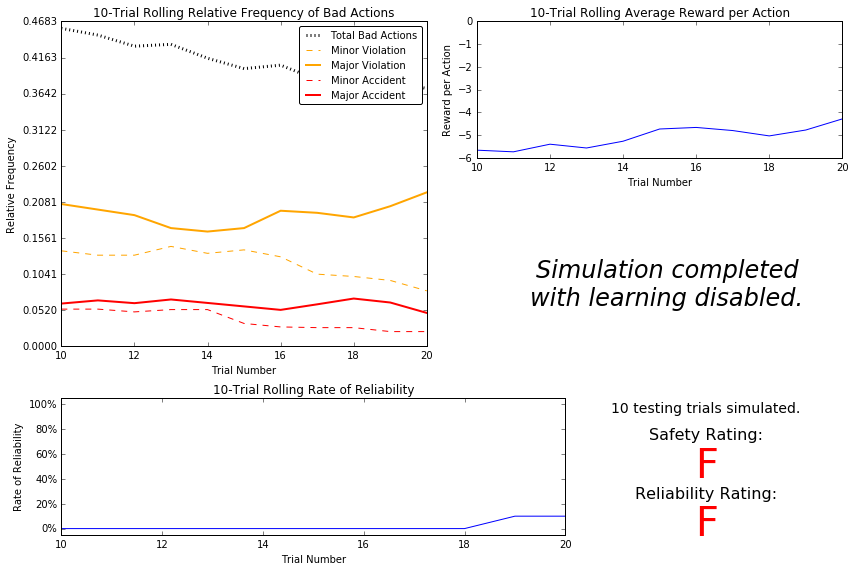

In [4]:
# Carregue o arquivo de log 'sim_no-learning' dos resultados da simulação inicial
vs.plot_trials('sim_no-learning.csv')

### Pergunta 3
Usando a visualização acima que foi produzida a partir da sua simulação inicial, forneça uma análise e faça diversas observações sobre o agente condutor. Verifique que você está fazendo ao menos uma observação sobre cada painel presente na visualização. Algumas coisas que você deve levar em consideração:
- *Com que frequência o agente condutor está tomando decisões ruins? Quantas destas decisões ruins causam acidentes?*
- *Dado que o agente está dirigindo aleatoriamente, a taxa de confiabilidade faz sentido?*
- *Que tipo de recompensa o agente está recebendo por suas ações? As recompensas sugerem que ele está sendo penalizado fortemente?*
- *O resultado obtido muda significativamente conforme o número de iterações aumenta?*
- *Este Smartcab seria considerado seguro e/ou confiável por seus passageiros? Por que ou por que não?*

**Resposta**

O agente condutor toma cerca de 40% de decisões ruins, delas 10% causam acidentes, sendo 5% acidentes graves e 5% acidentes menores.


A confiabilidade pegou a menor nota "F", o que significa que O agente não chega ao seu destino dentro do prazo em pelo menos 60% das viagens.
Isso faz sentido já que não existe nenhuma inteligencia na direção do condutor, apenas aleatoriedade.


A reconpensa é negativa, uma média de -5 por ação, o que faz com que mesmo que existam ações corretas as penalizações são maiores do que sendo positivamente recomepnsado.

O resultado é muito parecido em todos os testes, visto que não existe nenhuma inteligencia na escolha das decisões.

Esse smartcab não seria nada confiável para seus passageiros ou o mundo que habita, de smart não tem nada, seria apenas um randomcab, com decisões completamente arbitrárias e aleatórias.



-----
## Informe o Agente Condutor
O segundo passo para criar um agente condutor otimizado com o algoritmo Q-Learning é definir um conjunto de estados que um agente pode assumir em um ambiente. Dependendo da entrada, dados de sensores, e variáveis adicionais disponíveis para o agente condutor, um conjunto de estados pode ser definido para o agento de modo que ele possa eventualmente *aprender* que ação ele deve executar quando assume cada estado. A condição `'se estado então ação'` para cada estado é chamada de **política** e é, em última instância, o que espera-se que o agente condutor aprenda. Sem a definição de estados, o agente condutor nunca entenderia que ação é a melhor possível (ou ótima) -- ou mesmo que variáveis ambientais e condições importam!

### Identifique Estados
A observação da função `'build_state()'` mostra que o agente condutor obtém os seguintes dados do ambiente:
- `'waypoint'`, que é a direção que o *Smartcab* deve seguir para chegar ao destino, em relação à sua direção atual.
- `'inputs'`, que contém os dados de sensores do *Smartcab*, incluindo:
  - `'light'`, a cor do sinal luminoso ativo do semáforo.
  - `'left'`, a direção pretendida de navegação para um veículo à esquerda do *Smartcab*. Seu valor é `None` se não houver veículos à esquerda.
  - `'right'`, a direção pretendida de navegação para um veículo à direita do *Smartcab*. Seu valor é `None` se não houver veículos à direita.
  - `'oncoming'`, a direção pretendida de navegação para um veículo no sentido oposto de um cruzamento. Seu valor é `None` se não houver veículos no sentido oposto de um cruzamento.
- `'deadline'`, que é o número de ações remanescentes para o *Smartcab* chegar ao seu destino antes do seu prazo se encerrar.

### Pergunta 4
*Que características disponíveis para o agente são mais relevantes para o aprendizado tanto **seguro** quanto **eficiente**? Por que é que estas características são apropriadas para modelar o *Smartcab* no ambiente? Se você não escolheu algumas destas características, por que é que estas * não * são apropriadas?*

**Resposta:**

Todas as características são relevantes para segurança e eficiência, algumas delas mais do que outras, as mais importantes são:


**waypoint:**
É o "gps" do sistema, sem esse atributo o veículo só chegaria no destino por sorte, portanto para um aprendizado eficiente essa característica é crucial no aprendizado.

**light**
Para seguir com as "leis" do mundo em que vive, essa caracteristica indica quando o veículo tem que permanecer parado (em caso de red light) ou pode se mover com mais segurança.

**left e right**
Para eficiência, essas características são essenciais para que o veículo consiga se mover da melhor forma possível quando for possível.

### Defina um Espaço de Estados
Ao definir um conjunto de estados que o agente pode assumir, é necessário considerar o *tamanho* do espaço de estados. Quer dizer, se você espera que o agente condutor aprenda uma **política** para cada estado, você precisaria determinar uma ação ótima para *cada* estado que o agente possa ocupar. Se o número de estados possíveis for muito grande, pode ser que o agente condutor nunca aprenda o que fazer em alguns estados, o que pode levar a decisões desinformadas. Por exemplo, considere o caso em que as seguintes características são usadas para definir o estado do *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

>**Traduzindo:** "está chovendo", "está nublado", "sinal vermelho", "curva à esquerda", "sem trânsito", "última curva à esquerda", "horário".

Com que frequência você imagina que o agente assumiria um estado como `(False, True, True, True, False, False, '3AM')`? Sem que se disponibilize uma quantidade quase infinita de tempo para treinamento, é improvável que o agente consiga aprender a ação adequada!

### Pergunta 5
*Se um estado é definido pelas características que você escolheu na **Pergunta 4**, qual seria o tamanho do espaço de estados? Dado o que você sabe sobre o ambiente e como ele é simulado, você acredita que o agente condutor possa aprender uma política para cada estado possível em um número razoável de iterações de treinamento?*  
**Dica:** Considere as *combinações* de características para calcular o número total de estados!

**Resposta:**

Como alguns estados são menos importantes do que outros, acredito que o agente consiga aprender uma política para cada estado relevante na sua recompensa.

| Característica |  Quantid. |               Estados       |
|----------------|-----------|-----------------------------|
|   waypoint     |     3     |    forward, left, right     |
|   light        |     2     |            red, green       |
|   left         |     4     | None, forward, left, right  |
|   right        |     4     | None, forward, left, right  |

Levando essa tabela em conta (3x2x4x4) chegamos a 96 estados possiveís.

### Atualize o Estado do Agente Condutor
Para sua segunda implementação, navegue para a função `'build_state()'` do agente condutor. Com a justificativa que você forneceu na **Pergunta 4**, você agora vai modificar a variável `'state'` para uma tupla com todas características necessárias para o algoritmo Q-Learning. Confirme que seu agente condutor está atualizando seu estado rodando a simulação e verificando se o estado está sendo exibido. Se a visualização da simulação estiver ativada, confirme que o estado atualizado corresponde com o que está sendo exibido na simulação.

**Observação:** Lembre-se de resetar as flags de simulação para seus valores padrão quando fizer esta observação!

-----
## Implemente um Agente Condutor com o Algoritmo Q-Learning
O terceiro passo para criar um agente condutor otimizado com o algoritmo Q-Learning é começar a implementar o algoritmo de aprendizado em si. O conceito por trás do Q-Learning é relativamente simples: para cada estado que o agente visitar, crie uma entrada na tabela-Q para todos pares estado-ação disponíveis. Então, quando o agente encontrar um estado e realizar uma ação, atualize o valor-Q associado àquele par estado-ação baseado na recompensa recebida e a regra de atualização interativa implementada. É claro que benefícios adicionais vêm do uso do algoritmo Q-Learning, tais que podemos fazer com que o agente escolha a *melhor* ação para cada estado baseado nos valores-Q de cada par estado-ação possível. Para este projeto, você vai implementar um algoritmo Q-learning $\epsilon$*-guloso com decaimento,* *sem* fator de desconto. Siga as instruções de implementação marcadas com **TODO** (i.e. "a fazer") nas funções do agente.

Note que atributo `self.Q` do agente é um dicionário Python: é assim que a Q-table será formada. Cada estado será a chave do dicionário `self.Q`, e o valor associado à chave será então outro dicionário que armazena a *ação* como chave e o *valor-Q* como valor. O exemplo abaixo ilustra esta organização:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Além disso, note que espera-se que você use um *fator *$\epsilon$* (de exploração) com decaimento*. Assim, conforme o número de iterações aumenta, o valor de $\epsilon$ deve decair em direção ao 0. Isto é feito para que o agente aprenda com o seu comportamento e comece a agir de acordo com seu aprendizado (ao invés de priorizar a exploração de novas possibilidades). Além disso, o agente será testado usando o que ele aprendeu depois do valor de $\epsilon$ se reduzir abaixo de um determinado limiar (o valor padrão deste limiar é 0.01). Para a implementação inicial do algoritmo Q-Learning, você deve implementar uma função de decaimento linear para $\epsilon$.

### Resultados da Simulação com o Algoritmo Q-Learning
Para obter resultados da implementação inicial do algoritmo Q-Learning, você vai precisar ajustar as seguintes flags:
- `'enforce_deadline'` - Atribua o valor `True` a esta variável para forçar o agente condutor a registrar se ele chegou ao seu destino dentro do prazo.
- `'update_delay'` - Atribua um valor pequeno (como `0.01`) a  esta variável para reduzir o tempo entre passos em cada iteração.
- `'log_metrics'` - Atribua o valor `True` a esta variável para gravar os resultados da cimulação como um arquivo `.csv` e a tabela-Q como um arquivo `.txt` na pasta `/logs/`.
- `'n_test'` - Atribua o valor `'10'` a esta variável para executar 10 iterações de teste.
- `'learning'` - Atribua o valor `'True'` a  esta variável para sinalizar para o agente condutor que ele deve usar sua implementação do algoritmo Q-Learning.

Além disso, use a função de decaimento a seguir para $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{para a iteração número } t$$

Se você tiver dificuldade em fazer sua implementação funcionar, tente atribuir o valor `True` para a flag `'verbose'` para conseguir mais informações para depuração do código. Flags que foram alterada devem ser retornadas para seu valor inicial quando você estiver depurando. É importante que você entenda o que cada flag faz e como ela afeta a simulação!

Assim que você tiver completado com sucesso a simulação inicial com o algoritmo Q-Learning, execute a célula de código abaixo para visualizar os resultados. Note que arquivos de log são sobrescritos quando simulações idênticas são executadas, portanto tenha cuidado com qual arquivo de log está sendo carregado!

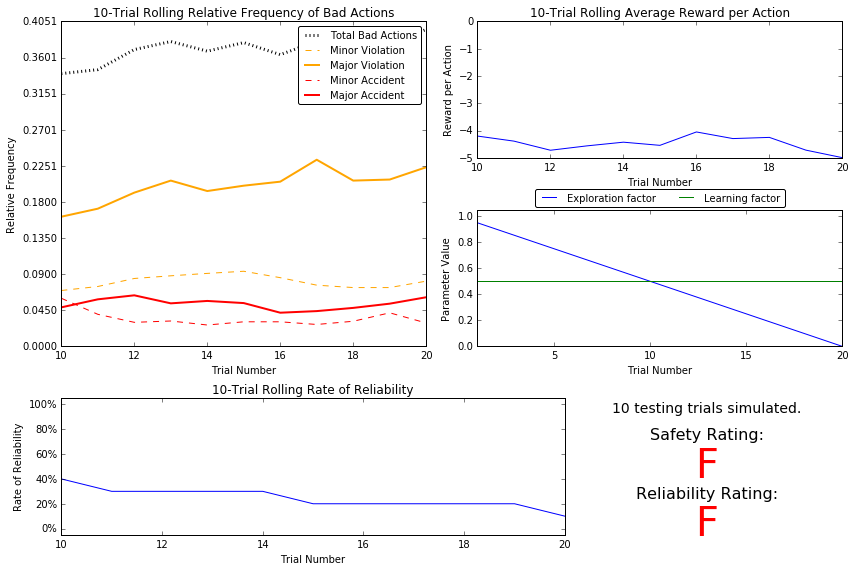

In [7]:
# Carregue o arquivo 'sim_default-learning' da simulação padrão do algoritmo Q-Learning
vs.plot_trials('sim_default-learning.csv')

### Pergunta 6
Usando a visualização acima que foi produzida a partir da sua simulação inicial com o algoritmo Q-Learning, forneça uma análise e faça observações sobre o agente condutor como na **Pergunta 3**. Note que a simulação também deve ter produzido uma tabela-Q em um arquivo texto que pode te ajudar a fazer observações sobre o aprendizado do agente. Algumas coisas adicionais que você deve levar em consideração: 
- *Existem quaisquer observações que são similares entre o agente condutor básico e o agente condutor padrão com o algoritmo Q-Learning?*
- *Quantas iterações de treinamento, aproximadamente, foram realizadas pelo agente condutor antes de iniciar a fase de testes? Esse número faz sentido quando avaliamos a tolerância-epsilon?*
- *A função de decaimento que você implementou para $\epsilon$ (o fator de exploração) está representado de forma precisa no painel de parâmetros?*
- *O número de decisões ruins diminuiu conforme o número de iterações de treinamento aumentou? E a recompensa média, aumentou?*
- *Como se comparam as avaliações de segurança e confiabilidade deste agente condutor e a versão inicial?*

**Resposta:**
No geral o smartcab teve melhorias diminuindo todos os indicies ruins como acidentes e violações, porém não o suficiente para aumentar sua nota no teste de segurança e confiabilidade, ambas com nota "F".

Foram feitas 20 iterações de treinamento, como a formula estava levando em conta diminuir o valor epsilon a cada iteração, já nas ultimas iterações o valor ficou com o default de 0.05.

A função de decaimento é explicitamente vista no painel de parâmetros, já que cria uma linha continua de exploração indo de 1.0 para 0.0 durante a fase de treino (em 20 passos).


A recompensa média se mantem estável na fase de treino, variando de -4 até -5, diferente do gente condutor básico, isso também é visto no número de decições ruins não diminui no treino, que se mantém estavel entre 0.35 e 0.40.


-----
## Melhore o Agente Condutor com o Algoritmo Q-Learning
O quarto passo para criar um agente condutor otimizado com o algoritmo Q-Learning é otimizá-lo! Agora que o algoritmo Q-Learning está implementado e o agente condutor está aprendendo com sucesso, é preciso ajustar as configurações e parêmetros de aprendizado para que o agente condutor aprenda como navegar de forma **segura** e **eficaz**. Tipicamente este passo vai exigir muita tentativa e erro, uma vez que algumas configurações irão invariavelmente piorar o aprendizado. Uma coisa para se manter em mente é o ato de aprender em si e o tempo que isso demora: teoricamente, nós poderíamos permitir que o agente aprendesse por um tempo incrivelmente longo; entretanto, outro objetivo do Q-Learning é *fazer a transição entre a experimentação com comportamentos não aprendidos e a ação com comportamentos aprendidos*. Por exemplo, sempre permitir que o agente execute ações aleatórias durante o treinamento (com $\epsilon = 1$, sem decaimento) certamente vai fazê-lo *aprender*, mas nunca vai deixá-lo *agir*. Quando estiver melhorando sua implementação do algoritmo Q-Learning, avalie as implicações de cada ajuste e se ele faz sentido logisticamente.

### Resultados da Simulação com o Algoritmo Q-Learning Melhorado
Para obter resultados da implementação melhorada do algoritmo Q-Learning, você vai precisar ajustar as seguintes flags:
- `'enforce_deadline'` - Atribua o valor `True` a esta variável para forçar o agente condutor a registrar se ele chegou ao seu destino dentro do prazo.
- `'update_delay'` - Atribua um valor pequeno (como `0.01`) a  esta variável para reduzir o tempo entre passos em cada iteração.
- `'log_metrics'` - Atribua o valor `True` a esta variável para gravar os resultados da cimulação como um arquivo `.csv` e a tabela-Q como um arquivo `.txt` na pasta `/logs/`.
- `'learning'` - Atribua o valor `'True'` a esta variável para sinalizar para o agente condutor que ele deve usar sua implementação do algoritmo Q-Learning.
- `'optimized'` - Atribua o valor `'True'` a esta variável para sinalizar para o agente condutor que você está executando uma versão otimizada do algoritmo Q-Learning.

Flags adicionais que podem ser ajustadas como parte da otimização do agente condutor com Q-Learning:
- `'n_test'` - Atribua um valor positivo a esta variável (que antes tinha valor 10) para executar esse número de iterações de teste.
- `'alpha'` - Atribua um valor numérico real entre 0 - 1 para ajustar a taxa de aprendizado do algoritmo Q-Learning.
- `'epsilon'` - Atribua um valor numérico real entre 0 - 1 para ajustar o fator de exploração inicial do algoritmo Q-Learning.
- `'tolerance'` - Atribua um valor numérico real positivo e pequeno (o valor padrão era 0.05) para ajustar a tolerância-epsilon, o limiar do fator de exploração a partir do qual se inicia a etapa de testes.

Além disso, use uma função de decaimento da sua escolha para $\epsilon$ (o fator de exploração). Note que qualquer função que você use **deve decair abaixo do valor definido para a variável **`'tolerance'`** segundo uma taxa razoável**. O agente condutor Q-Learning não vai começar a etapa de testes até que isso ocorra, então se o decaimento for lento demais o aprendizado pode demorar bastante. Algumas funções de decaimento exemplo (para $t$, o número de iterações):

$$ \epsilon = a^t, \textrm{para } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{para } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{para } 0 < a < 1$$
Você também pode usar uma função de decaimento para $\alpha$ (a taxa de aprendizagem) se você quiser, entretanto isso não é feito em geral. Se você decidir tentar, verifique que sua função de decaimento segue a condição expressa pela desigualdade $0 \leq \alpha \leq 1$.

Se você tiver dificuldade em fazer sua implementação funcionar, tente atribuir o valor `True` para a flag `'verbose'` para conseguir mais informações para depuração do código. Flags que foram alterada devem ser retornadas para seu valor inicial quando você estiver depurando. É importante que você entenda o que cada flag faz e como ela afeta a simulação!

Assim que você tiver completado com sucesso a simulação com o algoritmo Q-Learning, execute a célula de código abaixo para visualizar os resultados. Note que arquivos de log são sobrescritos quando simulações idênticas são executadas, portanto tenha cuidado com qual arquivo de log está sendo carregado!

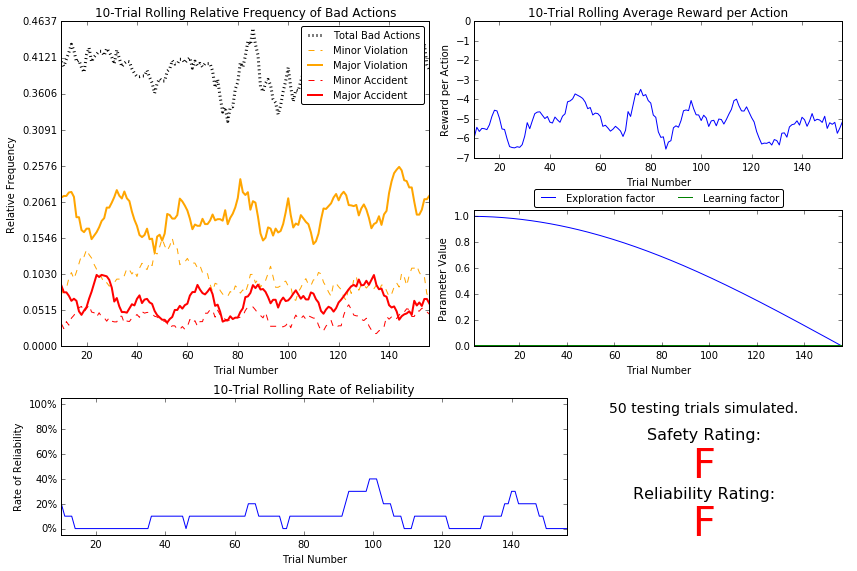

In [15]:
# Carregue o arquivo 'sim_improved-learning' da simulação do algoritmo Q-Learning melhorado
vs.plot_trials('sim_improved-learning.csv')

### Pergunta 7
Usando a visualização acima que foi produzida a partir da sua simulação com o algoritmo Q-Learning melhorado, forneça uma análise final e faça observações sobre o agente condutor melhorado como na **Pergunta 6**. Perguntas que você deve responder:
- *Que função de decaimento foi usada para epsilon (o fator de exploração)?*
- *Quantas iterações de treinamento, aproximadamente, foram necessárias para que seu agente iniciasse a fase de testes?*
- *Que valor você atribuiu para a tolerância-epsilon e alpha (taxa de aprendizagem)? Por que você escolheu esses valores?*
- *Qual foi o grau de melhoria foi obtido com esse agente, quanto comparado com o agente condutor com Q-Learning da seção anterior?*
- *Você diria que os resultados do algoritmo Q-Learning mostram que seu agente condutor aprendeu uma política apropriada?*
- *Você está satisfeito com as métricas de segurança e confiabilidade do seu *Smartcab*?*

**Resposta:**

### Defina uma Política Ótima

Às vezes, a resposta para a importante pergunta *"o que é que eu estou tentando fazer meu agente aprender?"* tem apenas uma resposta teórica e não pode ser expressa de forma concreta. Aqui, porém, você concretamente definir o que é que o agente está tentando aprender, e isso são as leis de trânsito (dos EUA). Já que essas leis são informações conhecidas, você pode definir, para cada estado assumido pelo *Smartcab*, a ação ótima para o agente condutor baseado nessas leis. Nesse caso, chamamos o conjunto de pares estado-ação ótimos de **política ótima**. Portanto, ao contrário de algumas respostas teóricas, podemos avaliar de forma clara se o agente está agindo "incorretamente" não apenas pela recompensa (punição) que recebe, mas também através da observação do seu comportamento. Se o agente atravessa um sinal vermelho, vemos tanto que ele recebe uma recompensa negativa, quanto sabemos que esse não é o comportamento correto. Isso pode ser explorado de forma vantajosa para verificar se a **política** que seu agente condutor aprendeu é a correta, ou se é uma **política subótima**.

### Pergunta 8
Dê alguns exemplos (usando os estados que você definiu) do que seria uma política ótima para este problema. Em seguida, investigue o arquivo de texto `'sim_improved-learning.txt'` para ver os resultados do seu algoritmo Q-Learning melhorado. _Para cada estado que tiver sido registrado na simulação, a **política** (a ação com maior valor) aprendida está correta? Existem quaisquer estados em que a política é diferente do que se espera de uma política ótima?_ Dê um exemplo de um estado e todas recompensas estado-ação registradas, explicando por que esta seria a política correta.

**Resposta:** 

-----
### Opcional: Recompensas Futuras - Fator de Desconto, `'gamma'`
Curiosamente, como parte do algoritmo Q-Learning algorithm, foi pedido que você **não** usasse o fator de desconto, `'gamma'`, na implementação. A inclusão de recompensas futuras no algoritmo é usada para ajudar na retropropagação de recompensas positivas de um estado futuro para um estado atual. Essencialmente, se ao agente condutor é dada a opção de executar uma série de ações e chegar em diferentes estados, incluir recompensas futuras vai enviesar o agente em direção a estados que poderiam fornecer ainda mais recompensas. Um exemplo disso seria o caso de um agente condutor se movimentando em direção a um objetivo: com todas ações e recompensas iguais, movimentar-se em direção a um objetivo teoricamente levaria a melhores recompensas se houvesse uma recompensa adicional por chegar ao objetivo. Entretanto, mesmo que neste projeto o agente condutor esteja tentando chegar a um destino em um prazo determinado, a inclusão de recompensas futuras não beneficiaria o agente. Na verdade, se o agente tivesse várias iterações para aprender, isso poderia até afetar os valores-Q de forma negativa!

### Pergunta Opcional 9
*Existem duas características do projeto que invalidam o uso de recompensas futuras no algoritmo Q-Learning. Uma característica tem a ver com o *Smartcab* em si, enquanto a outra tem a ver com o ambiente. Você consegue descobrir que características são essas e por que recompensas futuras não funcionarão para este projeto?*

**Resposta:**

> **Observação**: Quando você tiver terminado todas implementações de código e respondido com sucesso todas perguntas acima, você pode finalizar seu trabalho exportando o caderno iPython como um documento HTML. Você pode fazer isso usando o menu acima e navegando para 
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com este caderno como seu envio.